# Lec 16. NLTK & Konlpy

## 1. NLTK

In [1]:
import nltk

nltk.download("gutenberg")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
text = nltk.corpus.gutenberg.raw("shakespeare-macbeth.txt")

In [4]:
print(text[:500])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through 


In [5]:
# 소문자로 변환
text = text.lower()

In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text[:500]))

['[', 'the', 'tragedie', 'of', 'macbeth', 'by', 'william', 'shakespeare', '1603', ']', 'actus', 'primus', '.', 'scoena', 'prima', '.', 'thunder', 'and', 'lightning', '.', 'enter', 'three', 'witches', '.', '1.', 'when', 'shall', 'we', 'three', 'meet', 'againe', '?', 'in', 'thunder', ',', 'lightning', ',', 'or', 'in', 'raine', '?', '2.', 'when', 'the', 'hurley-burley', "'s", 'done', ',', 'when', 'the', 'battaile', "'s", 'lost', ',', 'and', 'wonne', '3.', 'that', 'will', 'be', 'ere', 'the', 'set', 'of', 'sunne', '1.', 'where', 'the', 'place', '?', '2.', 'vpon', 'the', 'heath', '3.', 'there', 'to', 'meet', 'with', 'macbeth', '1.', 'i', 'come', ',', 'gray-malkin', 'all', '.', 'padock', 'calls', 'anon', ':', 'faire', 'is', 'foule', ',', 'and', 'foule', 'is', 'faire', ',', 'houer', 'through']


In [7]:
from nltk.tokenize import RegexpTokenizer
# 정규 표현식
# https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D
tokens = RegexpTokenizer("[\w]+").tokenize(text[:500])   # 특수문자 제거
print(tokens)

['the', 'tragedie', 'of', 'macbeth', 'by', 'william', 'shakespeare', '1603', 'actus', 'primus', 'scoena', 'prima', 'thunder', 'and', 'lightning', 'enter', 'three', 'witches', '1', 'when', 'shall', 'we', 'three', 'meet', 'againe', 'in', 'thunder', 'lightning', 'or', 'in', 'raine', '2', 'when', 'the', 'hurley', 'burley', 's', 'done', 'when', 'the', 'battaile', 's', 'lost', 'and', 'wonne', '3', 'that', 'will', 'be', 'ere', 'the', 'set', 'of', 'sunne', '1', 'where', 'the', 'place', '2', 'vpon', 'the', 'heath', '3', 'there', 'to', 'meet', 'with', 'macbeth', '1', 'i', 'come', 'gray', 'malkin', 'all', 'padock', 'calls', 'anon', 'faire', 'is', 'foule', 'and', 'foule', 'is', 'faire', 'houer', 'through']


In [8]:
from nltk.corpus import stopwords
stopping = set(stopwords.words('english'))
print([token for token in tokens if not token in stopping])        

['tragedie', 'macbeth', 'william', 'shakespeare', '1603', 'actus', 'primus', 'scoena', 'prima', 'thunder', 'lightning', 'enter', 'three', 'witches', '1', 'shall', 'three', 'meet', 'againe', 'thunder', 'lightning', 'raine', '2', 'hurley', 'burley', 'done', 'battaile', 'lost', 'wonne', '3', 'ere', 'set', 'sunne', '1', 'place', '2', 'vpon', 'heath', '3', 'meet', 'macbeth', '1', 'come', 'gray', 'malkin', 'padock', 'calls', 'anon', 'faire', 'foule', 'foule', 'faire', 'houer']


In [9]:
'the' in stopping

True

In [10]:
# Stemming
from nltk.stem import PorterStemmer
[PorterStemmer().stem(token) for token in tokens][:30]

['the',
 'tragedi',
 'of',
 'macbeth',
 'by',
 'william',
 'shakespear',
 '1603',
 'actu',
 'primu',
 'scoena',
 'prima',
 'thunder',
 'and',
 'lightn',
 'enter',
 'three',
 'witch',
 '1',
 'when',
 'shall',
 'we',
 'three',
 'meet',
 'again',
 'in',
 'thunder',
 'lightn',
 'or',
 'in']

In [11]:
# 품사 태깅
from nltk.tag import pos_tag
print(pos_tag(tokens))

[('the', 'DT'), ('tragedie', 'NN'), ('of', 'IN'), ('macbeth', 'NN'), ('by', 'IN'), ('william', 'NN'), ('shakespeare', 'NN'), ('1603', 'CD'), ('actus', 'NN'), ('primus', 'NN'), ('scoena', 'NN'), ('prima', 'NN'), ('thunder', 'NN'), ('and', 'CC'), ('lightning', 'NN'), ('enter', 'NN'), ('three', 'CD'), ('witches', 'NNS'), ('1', 'CD'), ('when', 'WRB'), ('shall', 'MD'), ('we', 'PRP'), ('three', 'CD'), ('meet', 'NNS'), ('againe', 'VBP'), ('in', 'IN'), ('thunder', 'NN'), ('lightning', 'NN'), ('or', 'CC'), ('in', 'IN'), ('raine', 'JJ'), ('2', 'CD'), ('when', 'WRB'), ('the', 'DT'), ('hurley', 'NN'), ('burley', 'NN'), ('s', 'NN'), ('done', 'VBN'), ('when', 'WRB'), ('the', 'DT'), ('battaile', 'NN'), ('s', 'NN'), ('lost', 'VBN'), ('and', 'CC'), ('wonne', '$'), ('3', 'CD'), ('that', 'WDT'), ('will', 'MD'), ('be', 'VB'), ('ere', 'RB'), ('the', 'DT'), ('set', 'NN'), ('of', 'IN'), ('sunne', 'NN'), ('1', 'CD'), ('where', 'WRB'), ('the', 'DT'), ('place', 'NN'), ('2', 'CD'), ('vpon', 'IN'), ('the', 'DT'),

In [12]:
def tokenizer(tagger, doc):
    return ["/".join(p) for p in tagger(doc)]

In [13]:
tokenizer(pos_tag, tokens)[:30]

['the/DT',
 'tragedie/NN',
 'of/IN',
 'macbeth/NN',
 'by/IN',
 'william/NN',
 'shakespeare/NN',
 '1603/CD',
 'actus/NN',
 'primus/NN',
 'scoena/NN',
 'prima/NN',
 'thunder/NN',
 'and/CC',
 'lightning/NN',
 'enter/NN',
 'three/CD',
 'witches/NNS',
 '1/CD',
 'when/WRB',
 'shall/MD',
 'we/PRP',
 'three/CD',
 'meet/NNS',
 'againe/VBP',
 'in/IN',
 'thunder/NN',
 'lightning/NN',
 'or/CC',
 'in/IN']

## 2. Konlpy

In [14]:
import konlpy
from konlpy.tag import Okt as twit
# https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/#module-konlpy.tag._twitter

In [15]:
tagger = twit()

In [16]:
print(tagger.pos("역시 파이토치는 재미있네요 ㅋㅋㅋ"))

[('역시', 'Noun'), ('파', 'Noun'), ('이토', 'Noun'), ('치는', 'Verb'), ('재미있네요', 'Adjective'), ('ㅋㅋㅋ', 'KoreanParticle')]


In [17]:
print(tagger.nouns("사과는 맛있지만, 바나나는 맛없다"))

['사과', '바나나']


In [18]:
print(tagger.pos("아니, 이렇게 신기할수가?", stem=True))

[('아니다', 'Adjective'), (',', 'Punctuation'), ('이렇게', 'Adverb'), ('신기하다', 'Adjective'), ('?', 'Punctuation')]


In [19]:
tokenizer(tagger.pos, "사랑하는 자여 네 영혼이 잘됨 같이 네가 범사에 잘되고 강건하기를")

['사랑/Noun',
 '하는/Verb',
 '자/Noun',
 '여/Josa',
 '네/Noun',
 '영혼/Noun',
 '이/Josa',
 '잘/VerbPrefix',
 '됨/Verb',
 '같이/Adverb',
 '네/Noun',
 '가/Josa',
 '범사/Noun',
 '에/Josa',
 '잘/VerbPrefix',
 '되고/Verb',
 '강건/Noun',
 '하기를/Verb']

## 3. Other Tools For NLP

### WordCloud

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def DrawWordCloud(data):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', width= 800, height = 400).generate(data)
    plt.figure(figsize = (15 , 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

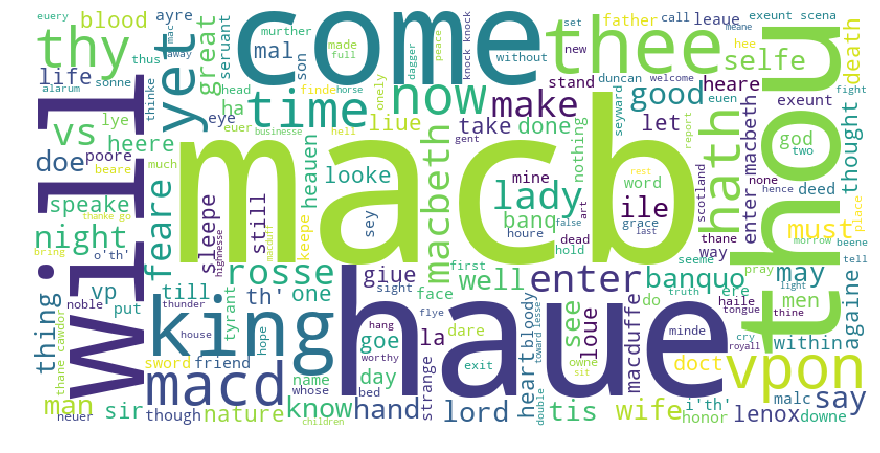

In [22]:
DrawWordCloud(text)

### Words Frequency

In [23]:
from collections import Counter
counts = dict(Counter(RegexpTokenizer("[\w]+").tokenize(text)).most_common(20))

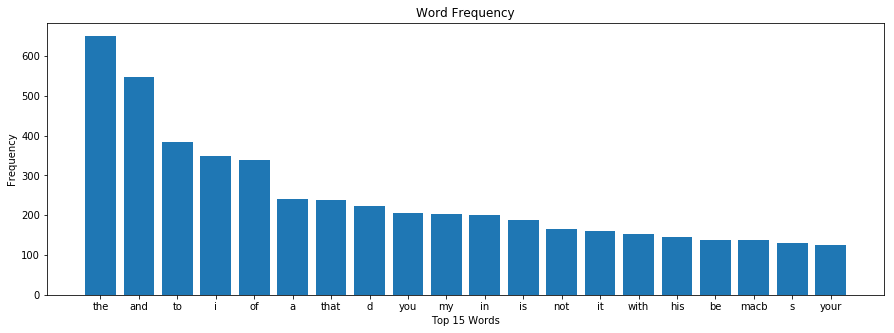

In [24]:
import numpy as np

# Zip keys = labels / values = values
labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

plt.figure(figsize=(15,5))

plt.xlabel('Top 15 Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')

plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

In [25]:
np.argsort(values)[::-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)